In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [4]:
# Loading the IBM HR Employee Attrition data
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
cols_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df = df.drop(columns=cols_to_drop)

In [6]:
# Convert 'Attrition' to 1/0 and One-Hot Encode other text columns
X = pd.get_dummies(df.drop('Attrition', axis=1), drop_first=True)
y = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardizing features so they are all on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Simple Logistic Regression as a benchmark
baseline = LogisticRegression(max_iter=2000).fit(X_train_scaled, y_train)

In [10]:
# Improved model using Random Forest for better accuracy
model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_scaled, y_train)

In [12]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, model.predict(X_test_scaled))

Text(0.5, 1.0, 'Model Accuracy: 87.76% | Employee Attrition')

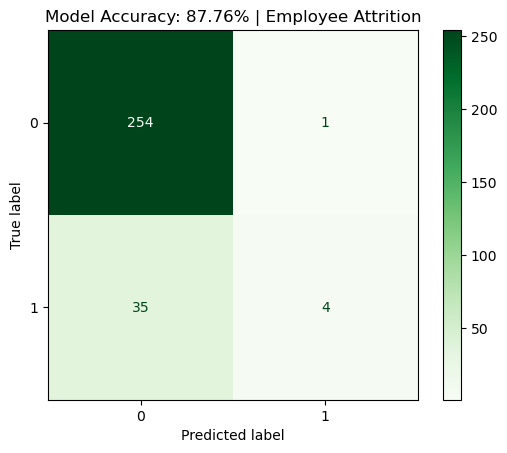

In [14]:
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='Greens')
plt.title(f"Model Accuracy: {acc*100:.2f}% | Employee Attrition")

Text(0.5, 1.0, 'Top 5 Drivers of Attrition')

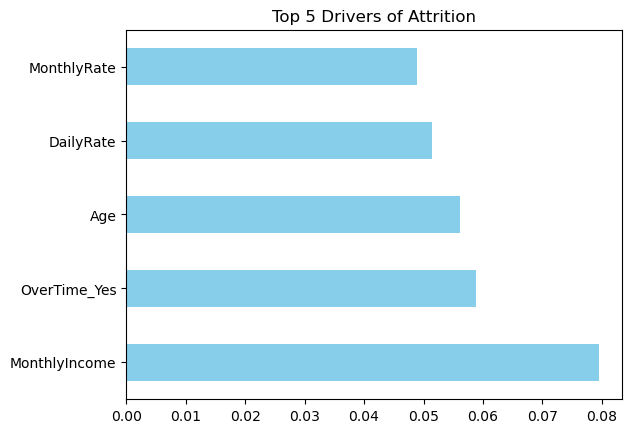

In [19]:
# Plotting the top factors that cause employees to leave
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh', color='skyblue')
plt.title("Top 5 Drivers of Attrition")

In [20]:

print("Week 2 Task: Supervised Model Completed")
print("model by Hadiqa Khan")

Week 2 Task: Supervised Model Completed
model by Hadiqa Khan
